In [1]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import datetime

In [2]:
data = []

message_to_type = {
    'afbeelding weggelaten': 'meme',
    'sticker weggelaten': 'sticker',
    'GIF weggelaten': 'GIF',
    'video weggelaten': 'video',
    'Dit bericht is verwijderd.': 'verwijderd',
}

with open('_chat.txt') as file:
    for i, line in enumerate(file.read().split('[')):
        line = line.strip('\n')
        if line != '':
            timestamp, rest = line.split('] ')
            timestamp = datetime.datetime.strptime(timestamp, "%d-%m-%Y %H:%M:%S")
            sender, message = rest.split(': ', maxsplit=1)
            message = message.strip('\u200e')
            message = message.strip('\n')
            message_type = 'bericht'
            if message in message_to_type:
                message_type = message_to_type[message]
            elif 'heeft' in message:
                if 'toegevoegd' in message:
                    message_type = 'toegevoegd'
                if 'verwijderd' in message:
                    message_type = 'verwijderd'
            elif 'document weggelaten' in message:
                message_type = 'document'
            elif 'PEILING' in message:
                message_type = 'peiling'
            data.append({
                'timestamp': timestamp,
                'sender': sender,
                'message': message,
                'type': message_type,
            })
            # if message == 'sticker weggelaten':
            #     print(message)
            # print(i, message)

df = pd.DataFrame(data)
df = df[df['timestamp'] > datetime.datetime(2022,12,31,23,59,59)]
# df
# df_personen = df[df['sender'] != 'MGMemes']
# df[df['sender'] == 'MGMemes']
# 'wijzigen groepsnaam'
# 'toevoegen/verwijderen van personen'
# 'heeft een spraakchat gestart'

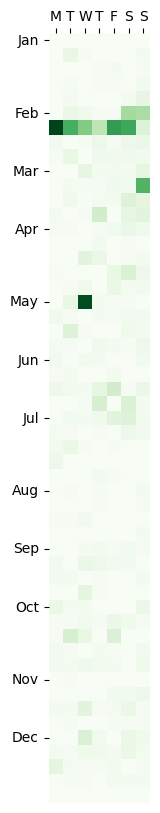

In [3]:
d_range = pd.date_range('2023-01-01', '2023-12-31', freq='D')
num_message = np.zeros((d_range[-1].isocalendar().week+1, 7))
this_df = df[df.type == 'meme']
num_contributions = this_df.groupby(this_df['timestamp'].dt.date).size()
for date, count in num_contributions.items():
    isodate = date.isocalendar()
    num_message[isodate.week, isodate.weekday-1] = count

plt.figure(figsize=(5, 10))
ax = sns.heatmap(
    num_message, 
    cmap='Greens',
    cbar=False,
    square=True,
)

weeks_month_start = [0.5]
month_names = ['Jan']
for month in range(2,13):
    date = datetime.date(year=2023,month=month,day=1)
    weeks_month_start.append(date.isocalendar().week + 0.5)
    month_names.append(date.strftime('%b'))

ax.set_yticks(weeks_month_start)
ax.set_yticklabels(month_names, rotation=0)

ax.set_xticklabels(
    ['M', 'T', 'W', 'T', 'F', 'S', 'S'], 
    # rotation=45, 
    # ha='left',
) 
ax.xaxis.set_ticks_position('top')
# ax.tick_params(axis='x', which='both', bottom=False, top=True)

plt.show()
